<h3 style="color:darkblue;">🫀CardioPredict: Deep Learning-Based Heart Disease Prediction with SHAP Explainability</h3>

<h4 style="color:darkred;">Data Libraries and a Quick Lookup</h4>

In [248]:
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [249]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [250]:
df.shape

(1025, 14)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [252]:
# Check missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [253]:
# Data stats
print("Dataset Statistics:")
df.describe()

Dataset Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h4 style="color:darkred;">Exploratory Data Analysis - EDA</h4>

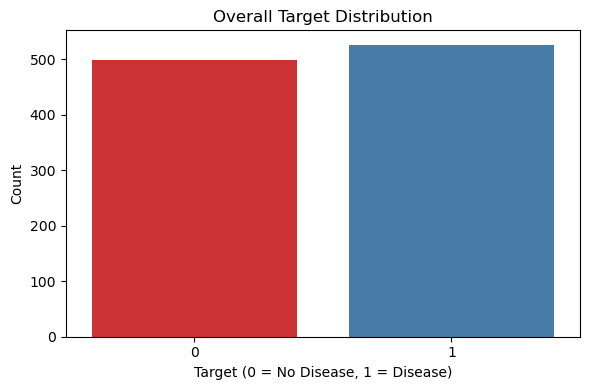

Target distribution:
target
1    526
0    499
Name: count, dtype: int64


In [254]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, hue='target', palette='Set1', legend=False)
plt.title('Overall Target Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Target count
print('Target distribution:')
print(df['target'].value_counts())

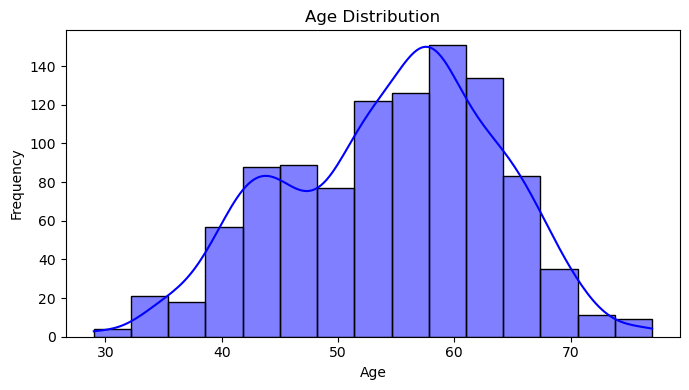

In [255]:
# Distribution of Age
plt.figure(figsize=(7, 4))
sns.histplot(df['age'], kde=True, bins=15, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

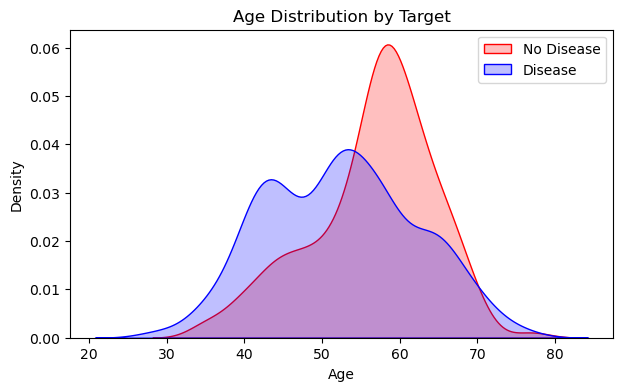

In [256]:
#  KDE Plot for Age by Target
plt.figure(figsize=(7, 4))
sns.kdeplot(df[df["target"] == 0]["age"], label="No Disease", fill=True, color="red")
sns.kdeplot(df[df["target"] == 1]["age"], label="Disease", fill=True, color="blue")
plt.title("Age Distribution by Target")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

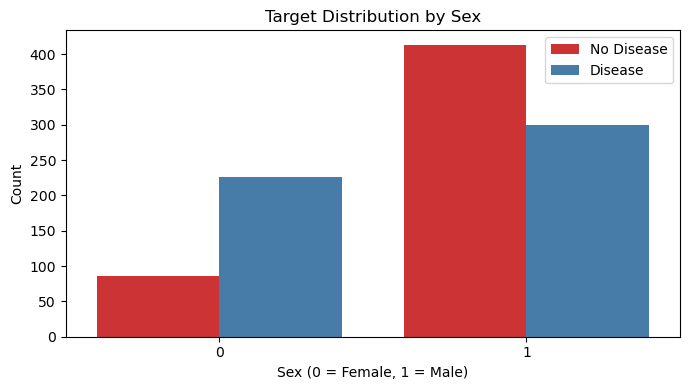

target    0    1   All
sex                   
0        86  226   312
1       413  300   713
All     499  526  1025


In [257]:
# Target vs. Sex
plt.figure(figsize=(7, 4))
sns.countplot(x='sex', hue='target', data=df, palette='Set1')
plt.title('Target Distribution by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

# Print the actual counts
print(pd.crosstab(df['sex'], df['target'], margins=True))

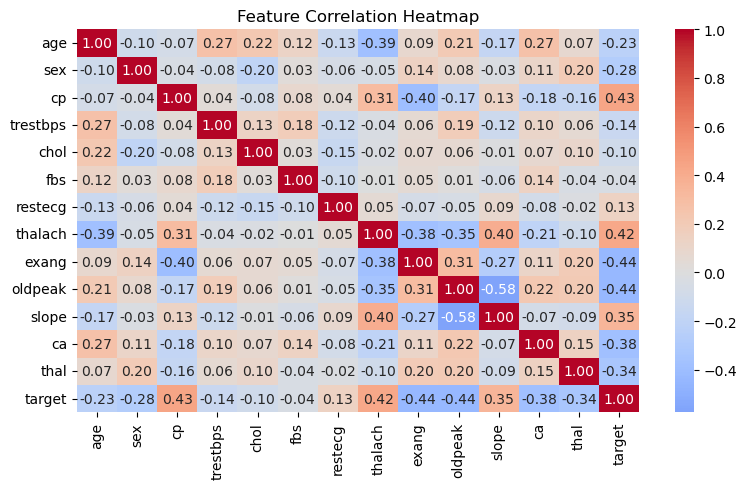

In [258]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

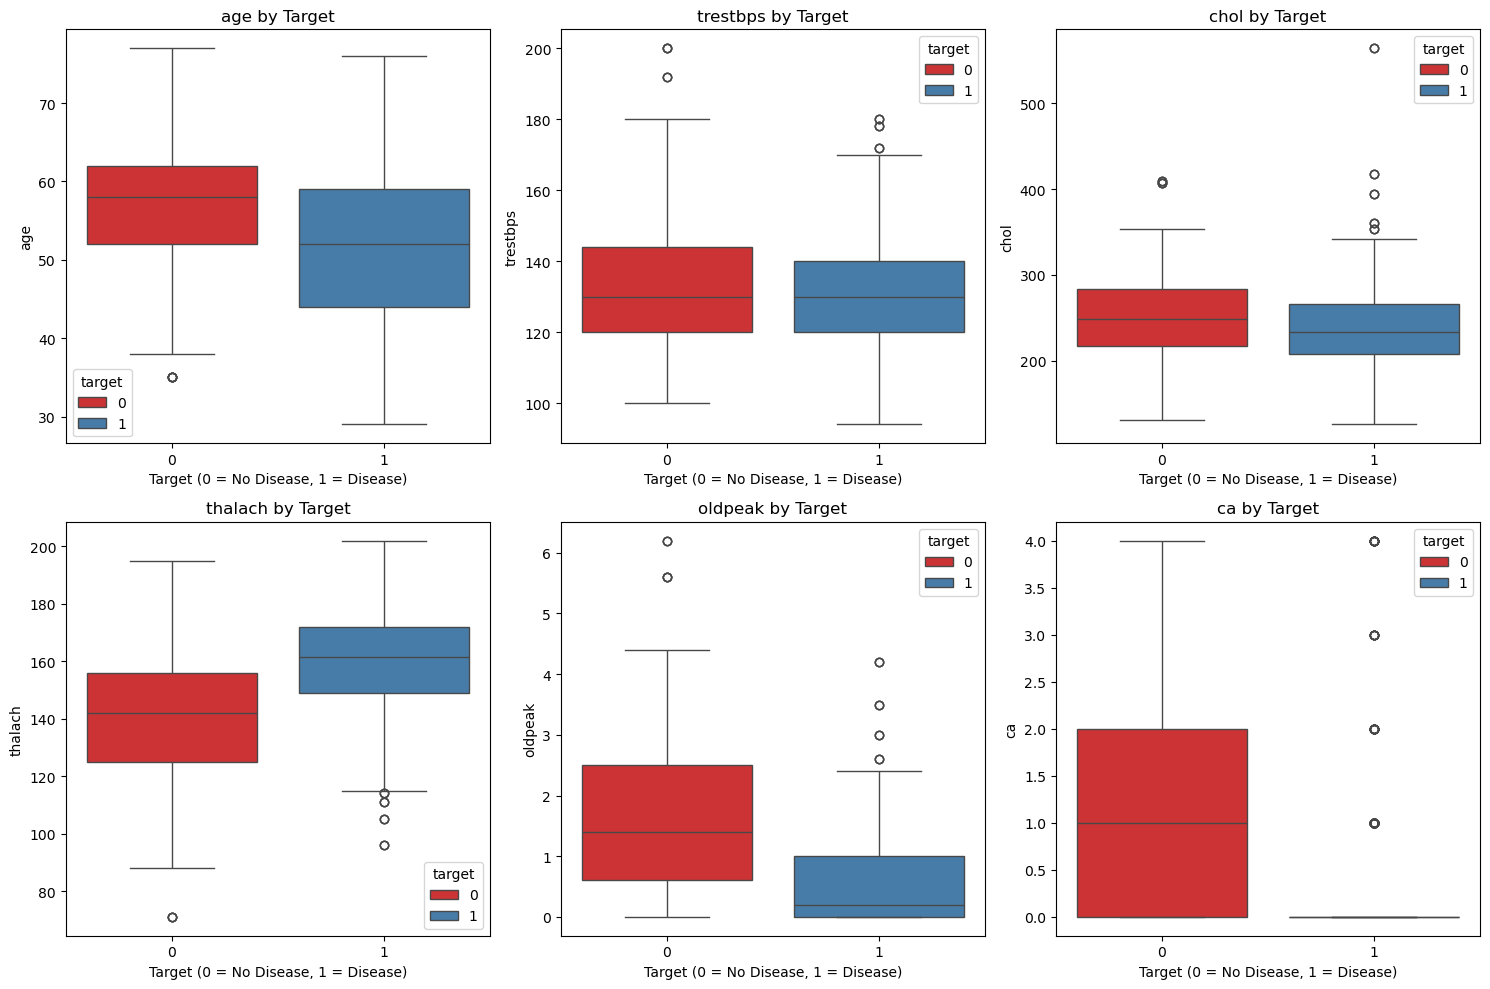

In [259]:
# Key continuous variables by target
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(continuous_vars):
    sns.boxplot(x='target', y=var, data=df, hue='target', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{var} by Target')
    axes[i].set_xlabel('Target (0 = No Disease, 1 = Disease)')

plt.tight_layout()
plt.show()

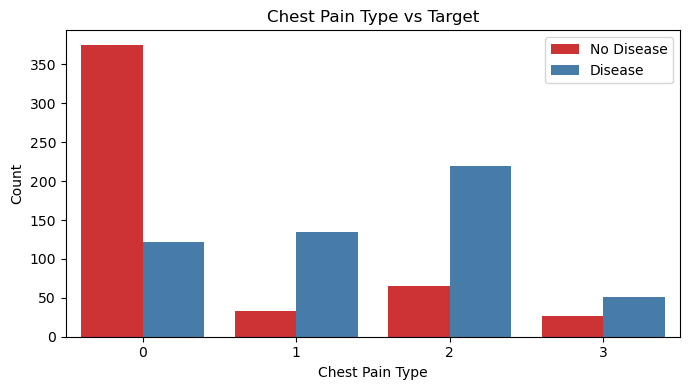

Chest pain distribution by target:
target    0    1   All
cp                    
0       375  122   497
1        33  134   167
2        65  219   284
3        26   51    77
All     499  526  1025


In [260]:
# Chest pain types vs target
plt.figure(figsize=(7, 4))
sns.countplot(x='cp', hue='target', data=df, palette='Set1')
plt.title("Chest Pain Type vs Target")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.tight_layout()
plt.show()
print("Chest pain distribution by target:")
print(pd.crosstab(df['cp'], df['target'], margins=True))

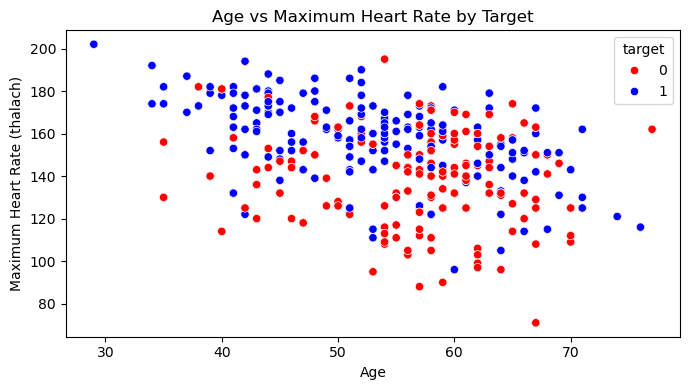

In [261]:
# Scatter Plot for Age vs. Maximum Heart Rate
plt.figure(figsize=(7, 4))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette=['red', 'blue'])
plt.title("Age vs Maximum Heart Rate by Target")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.tight_layout()
plt.show()

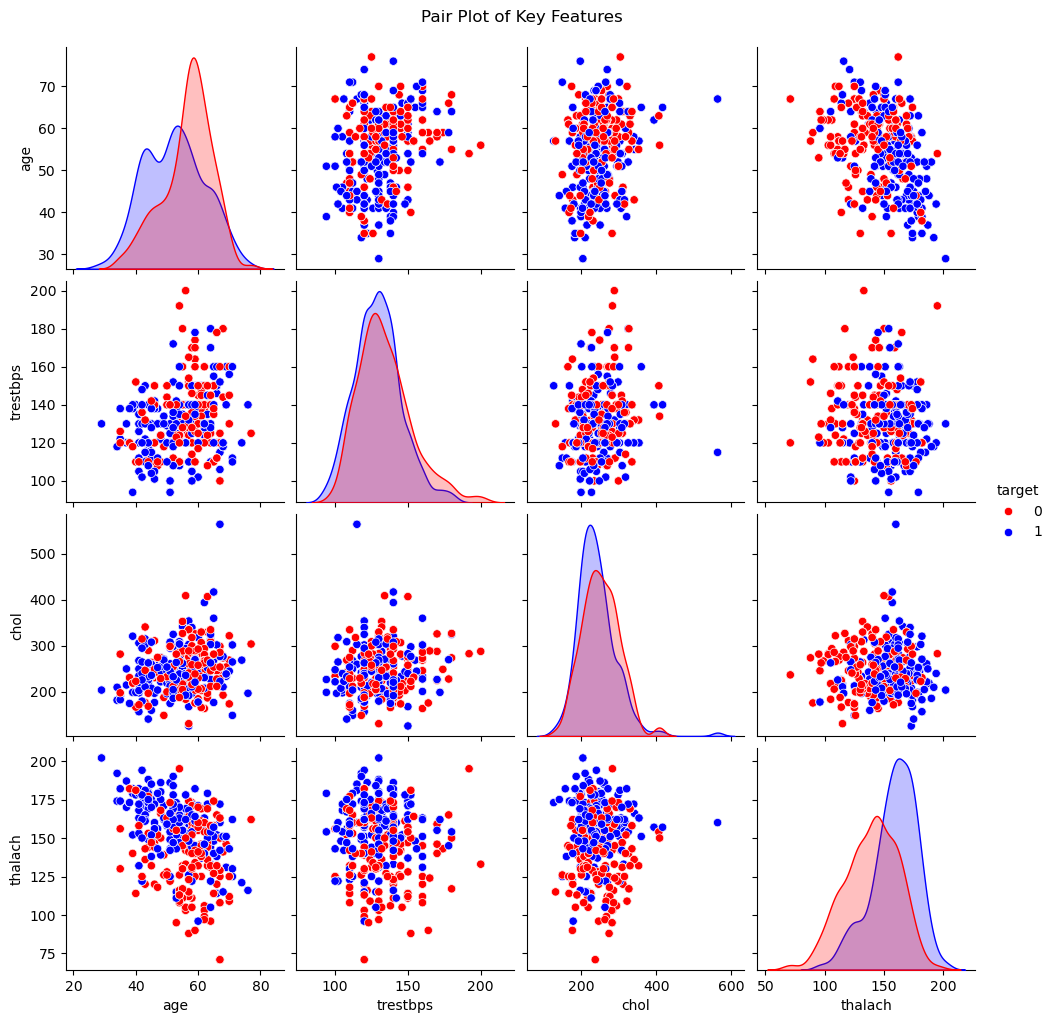

In [262]:
# Pair Plot for Key Features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[key_features], hue='target', palette=['red', 'blue'], diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

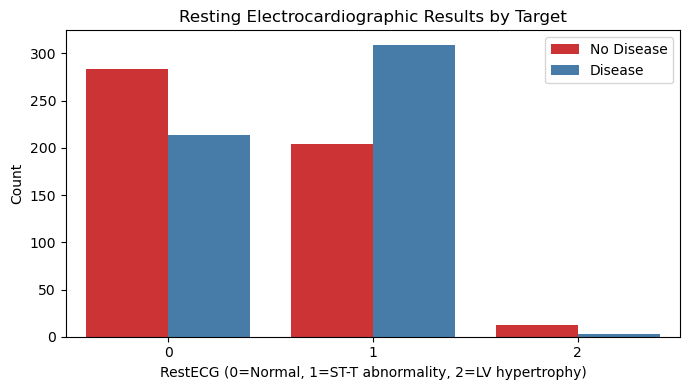

RestECG distribution by target:
target     0    1   All
restecg                
0        283  214   497
1        204  309   513
2         12    3    15
All      499  526  1025


In [263]:
# Resting Electrocardiographic Results by Target
plt.figure(figsize=(7, 4))
sns.countplot(x='restecg', hue='target', data=df, palette='Set1')
plt.title("Resting Electrocardiographic Results by Target")
plt.xlabel("RestECG (0=Normal, 1=ST-T abnormality, 2=LV hypertrophy)")
plt.ylabel("Count")
plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

print("RestECG distribution by target:")
print(pd.crosstab(df['restecg'], df['target'], margins=True))

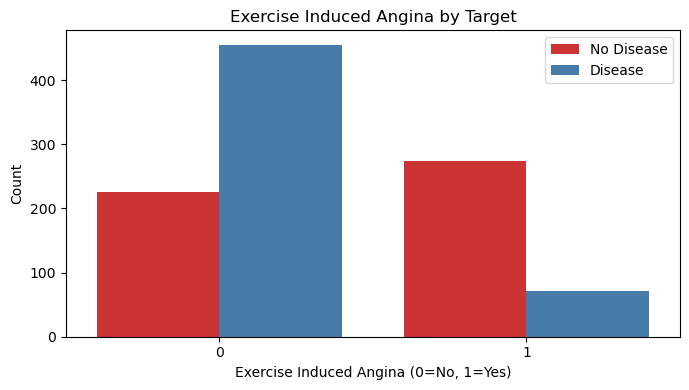

Exercise Induced Angina distribution by target:
target    0    1   All
exang                 
0       225  455   680
1       274   71   345
All     499  526  1025


In [264]:
# Exercise Induced Angina by Target
plt.figure(figsize=(7, 4))
sns.countplot(x='exang', hue='target', data=df, palette='Set1')
plt.title("Exercise Induced Angina by Target")
plt.xlabel("Exercise Induced Angina (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

print("Exercise Induced Angina distribution by target:")
print(pd.crosstab(df['exang'], df['target'], margins=True))

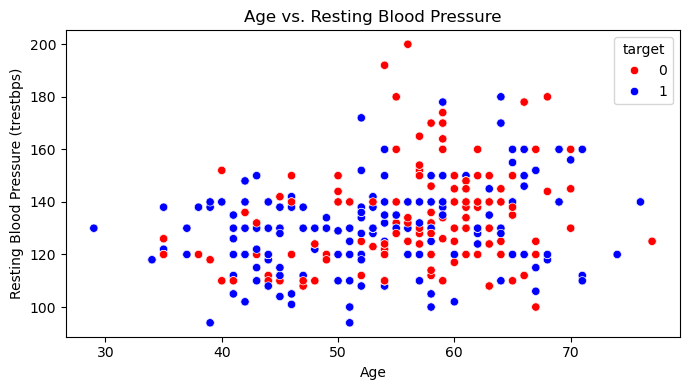

In [265]:
# Age vs. Resting Blood Pressure
plt.figure(figsize=(7, 4))
sns.scatterplot(x="age", y="trestbps", hue="target", data=df, palette=['red', 'blue'])
plt.title("Age vs. Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.tight_layout()
plt.show()

<h4 style="color:darkred;">Preprocessing</h4>

In [266]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [267]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [268]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [269]:
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Target distribution - Train: {np.bincount(y_train)}")
print(f"Target distribution - Test: {np.bincount(y_test)}")

Training set shape: (820, 13)
Test set shape: (205, 13)
Target distribution - Train: [399 421]
Target distribution - Test: [100 105]


<h4 style="color:darkred;">DNN Model</h4>

In [270]:
tf.random.set_seed(42)
model = Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') 
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [271]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [272]:
# callback setup
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    mode='max', 
    save_best_only=True, 
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

<h4 style="color:darkred;">Model Training</h4>

In [273]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,                  
    batch_size=64,
    validation_split=0.1,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5000 - loss: 0.7397
Epoch 1: val_accuracy improved from None to 0.76829, saving model to best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5339 - loss: 0.6858 - val_accuracy: 0.7683 - val_loss: 0.5913
Epoch 2/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7656 - loss: 0.5736
Epoch 2: val_accuracy did not improve from 0.76829
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7737 - loss: 0.5564 - val_accuracy: 0.7439 - val_loss: 0.5095
Epoch 3/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7812 - loss: 0.4964
Epoch 3: val_accuracy did not improve from 0.76829
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7818 - loss: 0.4912 - val_accuracy: 0.7439 - val_loss: 0.4659
Epoch 4/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8281 - loss: 0.4094
Epoch 4: val_accuracy did not improve from 0.76829
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8184 - loss: 0.4086

<h4 style="color:darkred;">Model Evaluation</h4>

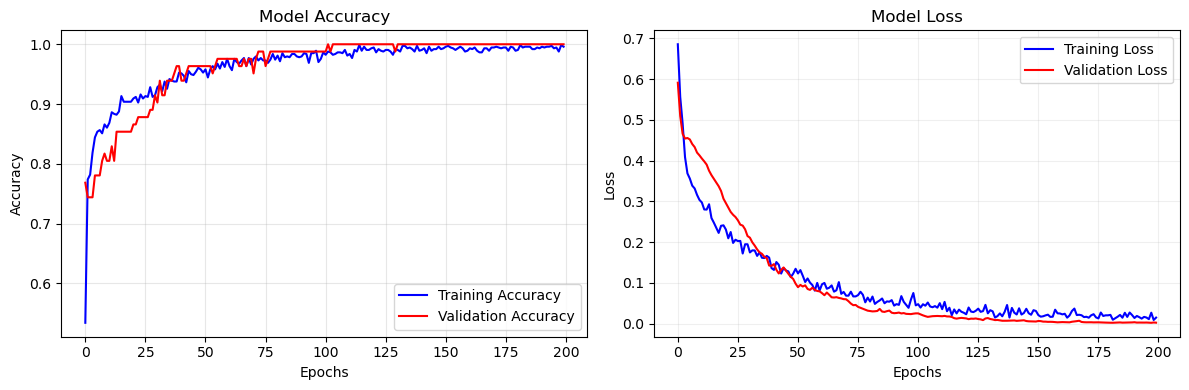

In [274]:
# Training History Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', color='blue')
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.2)


plt.tight_layout()
plt.show()

In [275]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 1.0000
Test Loss: 0.0011


In [276]:
# Classification Report
y_pred_proba = model.predict(X_test_scaled, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



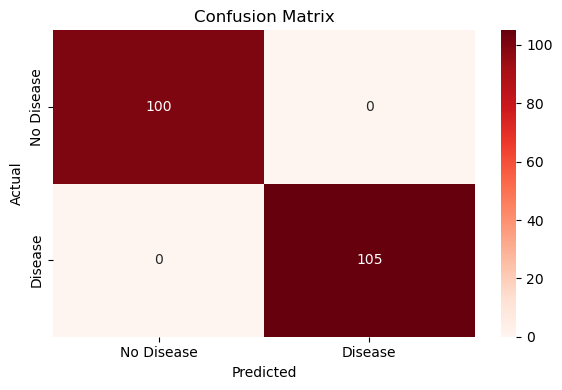

Confusion Matrix (Raw Values):
True Negatives (No Disease predicted as No Disease): 100
False Positives (No Disease predicted as Disease): 0
False Negatives (Disease predicted as No Disease): 0
True Positives (Disease predicted as Disease): 105



In [277]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
          xticklabels=['No Disease', 'Disease'], 
          yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Confusion Matrix values
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Raw Values):")
print(f"True Negatives (No Disease predicted as No Disease): {cm[0,0]}")
print(f"False Positives (No Disease predicted as Disease): {cm[0,1]}")
print(f"False Negatives (Disease predicted as No Disease): {cm[1,0]}")
print(f"True Positives (Disease predicted as Disease): {cm[1,1]}")
print()

In [278]:
# Insight:
# 100% Specificity: No false positives (correctly identified all healthy patients)
# 100% Sensitivity: No false negatives (correctly identified all diseased patients)
# Perfect classification: 205/205 correct predictions

<h4 style="color:darkred;">Model interpretability: Feature importance analysis using SHAP</h4>

<h4 style="color:darkred;">Save Model</h4>

PermutationExplainer explainer: 206it [00:34,  4.32it/s]                                       


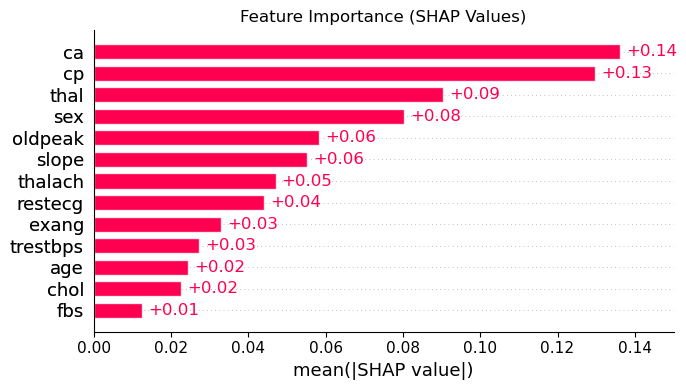

In [279]:
import shap
# Create SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Set feature names
shap_values.feature_names = X.columns.tolist()

# Feature importance plot
shap.plots.bar(shap_values, show=False, max_display=13)
plt.gcf().set_size_inches(7, 4)
plt.title('Feature Importance (SHAP Values)')
plt.tight_layout()
plt.show()

In [280]:
# Save model and scaler for deployment
import pickle
with open('heart_disease_pipeline.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'scaler': scaler,
        'feature_names': X.columns.tolist()
    }, f)